<a href="https://colab.research.google.com/github/Samanvibhat/Sentiment_analysis_major_project/blob/main/Major_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!git clone https://github.com/Samanvibhat/Sentiment_analysis_major_project


Cloning into 'Sentiment_analysis_major_project'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (3/3), done.


In [9]:
%cd Sentiment_analysis_major_project


[Errno 2] No such file or directory: 'Sentiment_analysis_major_project'
/content/Sentiment_analysis_major_project/Sentiment_analysis_major_project


In [8]:
cd ~/Sentiment_analysis_major_project


[Errno 2] No such file or directory: '/root/Sentiment_analysis_major_project'
/content/Sentiment_analysis_major_project/Sentiment_analysis_major_project


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from IPython.display import Audio
import librosa
import librosa.display

In [11]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [12]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [13]:
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [14]:
!pip install tensorflow numpy librosa


In [15]:

import matplotlib.pyplot as plt

!pip install -q kaggle

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"samanvithavadwa","key":"382b59bfba36f536320a6012f32532d0"}'}

In [16]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

! kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess

!unzip toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_burn_angry.wav  
  inflating: TESS Toronto emotional 

In [17]:
import os
import numpy as np
import librosa
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [18]:
# Function to extract MFCC features from audio files
def extract_mfcc(file_path, max_pad_len=300):
    wave, sr = librosa.load(file_path, mono=True, sr=None)
    mfcc = librosa.feature.mfcc(wave, sr=sr)
    pad_width = max_pad_len - mfcc.shape[1]
    mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
    return mfcc

In [21]:
data_dir="/content/Sentiment_analysis_major_project/Sentiment_analysis_major_project/TESS Toronto emotional speech set data"


In [22]:
import os
import numpy as np
import librosa

data_dir = '/content/Sentiment_analysis_major_project/Sentiment_analysis_major_project/TESS Toronto emotional speech set data'

features = []
labels = []

for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):
        emotion_label = folder.split('_')[-1]  # Extract the emotion label from the folder name

        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            if file_path.endswith('.wav'):
                # Load the audio file and extract features
                audio, sr = librosa.load(file_path, duration=3)  # Adjust the duration as needed
                mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
                mfcc_mean = np.mean(mfcc, axis=1)
                features.append(mfcc_mean)
                labels.append(emotion_label)

# Convert lists to NumPy arrays
features = np.array(features)
labels = np.array(labels)

# Reshape features to match the model's input shape
features = features[:, :, np.newaxis, np.newaxis]  # Add two new axes




In [23]:

features = np.array(features)
labels = np.array(labels)

In [24]:
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

In [25]:
# Define the emotions and the number of samples to select from each emotion
emotions = ['angry', 'disgust', 'Fear', 'happy', 'neutral', 'Sad', 'Pleasant_surprise']
num_samples_per_emotion = 3
# Initialize empty lists for storing the selected samples
selected_samples = []


In [26]:
for emotion in emotions:
    emotion_dir = os.path.join(data_dir, f'OAF_{emotion}')
    audio_files = os.listdir(emotion_dir)
    selected_files = np.random.choice(audio_files, size=num_samples_per_emotion, replace=False)

    for file_name in selected_files:
        file_path = os.path.join(emotion_dir, file_name)
        audio, sr = librosa.load(file_path, duration=3)
        selected_samples.append((audio, sr, emotion))


In [27]:
num_samples = len(selected_samples)
plt.figure(figsize=(8, 4 * num_samples))

<Figure size 800x8400 with 0 Axes>

<Figure size 800x8400 with 0 Axes>

<ipython-input-28-aa5fddee396d>:6: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


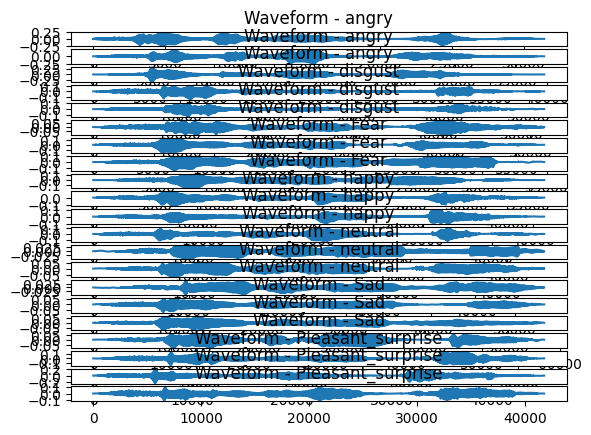

In [28]:

for i, (audio, sr, emotion) in enumerate(selected_samples):
    plt.subplot(num_samples, 1, i + 1)
    plt.plot(audio)
    plt.title(f'Waveform - {emotion}')

plt.tight_layout()
plt.show()

In [29]:

import numpy as np

# Apply audio transformations (e.g., noise addition, time stretching, pitch shifting)
augmented_features = []
augmented_labels = []

In [30]:

for feature, label in zip(features, labels):
    augmented_features.append(feature)
    augmented_labels.append(label)

    # Apply noise addition
    noise = np.random.randn(len(feature))
    augmented_features.append(feature + 0.005 * noise)  # Adjust the noise magnitude as needed
    augmented_labels.append(label)

    # Apply time stretching
    augmented_features.append(librosa.effects.time_stretch(feature, rate=1.2))  # Adjust the rate as needed
    augmented_labels.append(label)

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1
  warnings.warn(


In [31]:
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

print(augmented_labels)

augmented_labels = np.array(augmented_labels)
print(augmented_labels)

preprocessed_data = []
file_list = os.listdir(data_dir)

['Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear', 'Fear',

In [32]:
for filename in file_list:
    file_path = os.path.join(data_dir, filename)

    # Skip non-audio files
    if not filename.endswith('.wav'):
        continue

    # Load the audio file and obtain the waveform and sample rate
    waveform, sr = librosa.load(file_path, sr=None, dtype=np.float32)

    # Resample the audio if needed
    if sr != 22050:
        waveform = librosa.resample(waveform, sr, 22050)
        sr = 22050


In [33]:

# Encode the emotion labels
label_mapping = {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5}
encoded_labels = np.array([label_mapping.get(label, -1) for label in labels])


In [34]:
# Filter out any samples with unknown emotion labels
valid_indices = np.where(encoded_labels != 1)[0]  # Get the indices from the tuple
features = features[valid_indices]
encoded_labels = encoded_labels[valid_indices]

In [35]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, encoded_labels, test_size=0.2, random_state=42)

In [36]:
# Reshape the input features
X_train = X_train.reshape((*X_train.shape, 1))
X_test = X_test.reshape((*X_test.shape, 1))

In [37]:
# Convert the emotion labels to categorical format
num_classes = len(label_mapping)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1920, 13, 1, 1, 1)
y_train shape: (1920, 6)
X_test shape: (480, 13, 1, 1, 1)
y_test shape: (480, 6)


In [38]:


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(13, 1, 1), padding='same'))

model.add(Flatten())

In [39]:

# dense layer0
model.add(Dense(32, activation='relu'))

#  output layer
model.add(Dense(6, activation='softmax'))

# result
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 13, 1, 32)         320       
                                                                 
 flatten (Flatten)           (None, 416)               0         
                                                                 
 dense (Dense)               (None, 32)                13344     
                                                                 
 dense_1 (Dense)             (None, 6)                 198       
                                                                 
Total params: 13862 (54.15 KB)
Trainable params: 13862 (54.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
30/30 [==============================] - 1s 13ms/step - loss: 1.7452 - accuracy: 0.4198 - val_loss: 1.0873 - val_accuracy: 0.5167
Epoch 2/10
30/30 [==============================] - 0s 4ms/step - loss: 0.9085 - accuracy: 0.6391 - val_loss: 0.7858 - val_accuracy: 0.6854
Epoch 3/10
30/30 [==============================] - 0s 5ms/step - loss: 0.6838 - accuracy: 0.7464 - val_loss: 0.6649 - val_accuracy: 0.7688
Epoch 4/10
30/30 [==============================] - 0s 5ms/step - loss: 0.5807 - accuracy: 0.7917 - val_loss: 0.5616 - val_accuracy: 0.8021
Epoch 5/10
30/30 [==============================] - 0s 6ms/step - loss: 0.5016 - accuracy: 0.8292 - val_loss: 0.5916 - val_accuracy: 0.7604
Epoch 6/10
30/30 [==============================] - 0s 4ms/step - loss: 0.4792 - accuracy: 0.8359 - val_loss: 0.4873 - val_accuracy: 0.8167
Epoch 7/10
30/30 [==============================] - 0s 5ms/step - loss: 0.4439 - accuracy: 0.8359 - val_loss: 0.4713 - val_accuracy: 0.8188
Epoch 8/10
30/30 [=

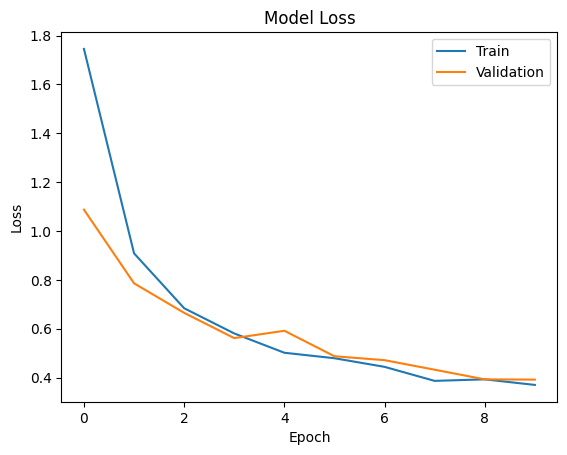

In [40]:

history = model.fit(X_train, y_train, batch_size=64, epochs=10, validation_data=(X_test, y_test))
loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

print("Accuracy  : " , model.evaluate(X_test,y_test)[1]*100 , "%")

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

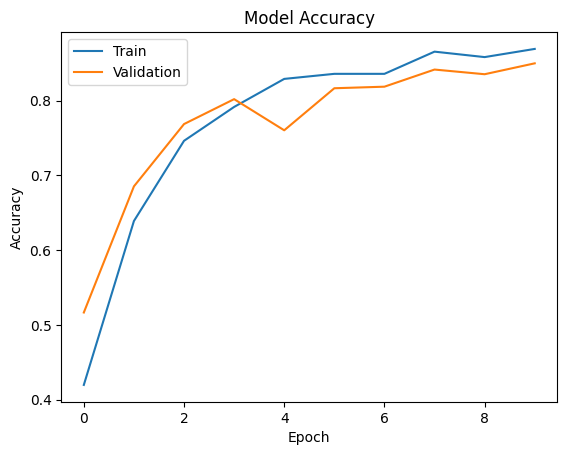

In [41]:

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [90]:
#  predictlabels for the test set
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)  # one-hot encoded predictions to labels

# Convert  labels from one-hot encoding to labels
y_true_labels = np.argmax(y_test, axis=1)

# confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

class_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad','Pleasant_surprise']
report = classification_report(y_true_labels, y_pred_labels, target_names=class_names, labels=range(len(class_names)))
print(classification_report)

15/15 [==============================] - 0s 2ms/step
<function classification_report at 0x7c59dd15ad40>


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

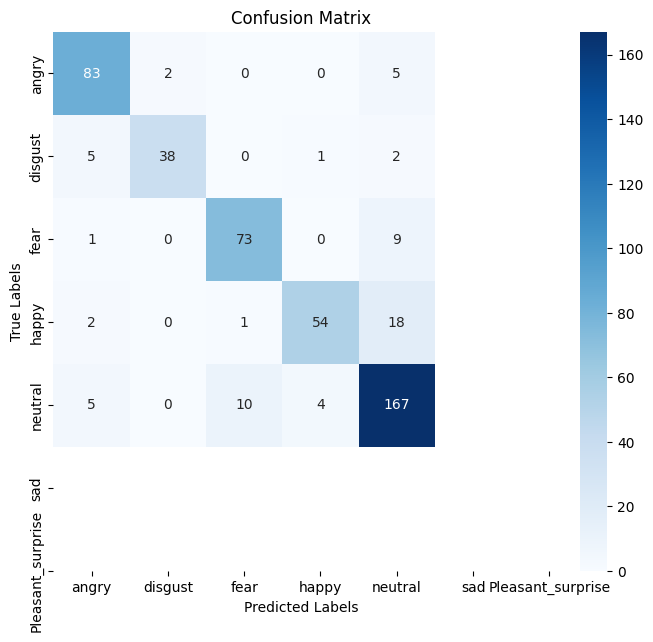

                   precision    recall  f1-score   support

            angry       0.86      0.92      0.89        90
          disgust       0.00      0.00      0.00         0
             fear       0.95      0.83      0.88        46
            happy       0.87      0.88      0.87        83
          neutral       0.92      0.72      0.81        75
              sad       0.83      0.90      0.86       186
Pleasant_surprise       0.00      0.00      0.00         0

        micro avg       0.86      0.86      0.86       480
        macro avg       0.63      0.61      0.62       480
     weighted avg       0.87      0.86      0.86       480



In [92]:

# plot the confusion matrix
plt.figure(figsize=(8, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print(report)

In [44]:
#for train
history = model.fit(X_train, y_train, validation_split=0.3, epochs=10, batch_size=64)

print("Accuracy of train : " , model.evaluate(X_train,y_train)[1]*100 , "%")

Epoch 1/10
21/21 [==============================] - 0s 8ms/step - loss: 0.3516 - accuracy: 0.8624 - val_loss: 0.3032 - val_accuracy: 0.8976
Epoch 2/10
21/21 [==============================] - 0s 5ms/step - loss: 0.3330 - accuracy: 0.8728 - val_loss: 0.3436 - val_accuracy: 0.8819
Epoch 3/10
21/21 [==============================] - 0s 6ms/step - loss: 0.3218 - accuracy: 0.8832 - val_loss: 0.3524 - val_accuracy: 0.8785
Epoch 4/10
21/21 [==============================] - 0s 5ms/step - loss: 0.3278 - accuracy: 0.8750 - val_loss: 0.2768 - val_accuracy: 0.9149
Epoch 5/10
21/21 [==============================] - 0s 5ms/step - loss: 0.3013 - accuracy: 0.8914 - val_loss: 0.2894 - val_accuracy: 0.9062
Epoch 6/10
21/21 [==============================] - 0s 5ms/step - loss: 0.3040 - accuracy: 0.8884 - val_loss: 0.2816 - val_accuracy: 0.9080
Epoch 7/10
21/21 [==============================] - 0s 5ms/step - loss: 0.2965 - accuracy: 0.8891 - val_loss: 0.2755 - val_accuracy: 0.9062
Epoch 8/10
21/21 [==

In [45]:
def predict_emotion(audio_file):
    features = extract_features(audio_file)
    features = features[np.newaxis, np.newaxis, :]
    print("Features shape:", features.shape)
    print("Features:", features)

    predicted_probabilities = model.predict(features)
    print("Predicted probabilities shape:", predicted_probabilities.shape)
    print("Predicted probabilities:", predicted_probabilities)

    predicted_label_index = np.argmax(predicted_probabilities)
    print("Predicted label index:", predicted_label_index)

    predicted_emotion = label_encoder.classes_[predicted_label_index]
    print("Predicted emotion:", predicted_emotion)


    # Emotion mapping for TESS dataset
    emotion_mapping = {
        'YAF_angry': 'ANGRY',
        'YAF_disgust': 'DISGUST',
        'YAF_fear': 'FEAR',
        'YAF_happy': 'HAPPY',
        'YAF_neutral': 'NEUTRAL',
        'YAF_pleasant_surprised': 'SURPRISED',
        'YAF_sad': 'SAD',
        'OAF_angry': 'ANGRY',
        'OAF_disgust': 'DISGUST',
        'OAF_Fear': 'FEAR',
        'OAF_happy': 'HAPPY',
        'OAF_neutral': 'NEUTRAL',
        'OAF_Pleasant_surprised': 'SURPRISED',
        'OAF_Sad': 'SAD',
    }


    recognizable_emotion = emotion_mapping.get(predicted_emotion)
    return recognizable_emotion

In [46]:
import numpy as np
from tensorflow.keras.models import load_model

In [47]:
def extract_features(audio_file):
  data_dir = '/content/Sentiment_analysis_major_project/Sentiment_analysis_major_project/TESS Toronto emotional speech set data'

  features = []
  labels = []

  for folder in os.listdir(data_dir):
      folder_path = os.path.join(data_dir, folder)
      if os.path.isdir(folder_path):
          emotion_label = folder.split('_')[-1]  # Extract the emotion label from the folder name

          for file_name in os.listdir(folder_path):
              file_path = os.path.join(folder_path, file_name)
              if file_path.endswith('.wav'):
                  # Load the audio file and extract features
                  audio, sr = librosa.load(file_path, duration=3)  # Adjust the duration as needed
                  mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
                  mfcc_mean = np.mean(mfcc, axis=1)
                  features.append(mfcc_mean)
                  labels.append(emotion_label)

  # Convert lists to NumPy arrays
  features = np.array(features)
  labels = np.array(labels)

  # Reshape features to match the model's input shape
  features = features[:, :, np.newaxis, np.newaxis]  # Add two new axes

  return features

In [48]:
from keras.models import load_model

In [49]:
filename = 'my_model.h5'
loaded_model = load_model(filename)

In [50]:
model_input_shape = loaded_model.input_shape
print(f"Model input shape: {model_input_shape}")

Model input shape: (None, 13, 1, 1)


In [51]:
import pickle
import numpy as np
from sklearn.preprocessing import StandardScaler
from keras.models import load_model

In [53]:
import h5py

# Replace 'my_model.h5' with the actual file path
with h5py.File('/content/Sentiment_analysis_major_project/Sentiment_analysis_major_project/my_model.h5', 'r') as f:
    # Access and print some attributes or groups from the file
    print(f.keys())
    print(f['model_weights'].keys())


<KeysViewHDF5 ['model_weights', 'optimizer_weights']>
<KeysViewHDF5 ['conv2d', 'dense', 'dense_1', 'flatten', 'top_level_model_weights']>


In [54]:
import numpy as np

In [55]:
print(features.shape)

(2400, 13, 1, 1)


In [56]:
features = np.array(features)  # Convert features list to NumPy array

# Reshape features to match the model's input shape
features = np.expand_dims(features, axis=-1)  # Add a new axis at the end
features = np.expand_dims(features, axis=-1)  # Add another new axis


In [57]:
features = np.array(features)  # Convert features list to NumPy array

# Reshape features to match the model's input shape
features = np.expand_dims(features, axis=-1)  # Add a new axis at the end
features = np.expand_dims(features, axis=-1)  # Add another new axis

# Ensure that the last dimension matches the expected size (1)
features = np.repeat(features, repeats=1, axis=-1)


In [58]:
import pandas as pd
import os
import librosa
import numpy as np

# Define the emotions and the number of samples to select from each emotion
emotions = ['angry', 'disgust', 'Fear', 'happy', 'neutral', 'Sad','Pleasant_surprise']
num_samples_per_emotion = 3
# Initialize empty lists for storing the selected samples
selected_samples = []
for emotion in emotions:
    emotion_dir = os.path.join(data_dir, f'OAF_{emotion}')
    audio_files = os.listdir(emotion_dir)
    selected_files = np.random.choice(audio_files, size=num_samples_per_emotion, replace=False)

    for file_name in selected_files:
        file_path = os.path.join(emotion_dir, file_name)
        audio, sr = librosa.load(file_path, duration=3)
        selected_samples.append((audio, sr, emotion))

# Convert selected samples to a DataFrame
df = pd.DataFrame(selected_samples, columns=['audio', 'sr', 'emotion'])

# Check the data balance
emotion_counts = df['emotion'].value_counts()
print(emotion_counts)


emotion
angry                3
disgust              3
Fear                 3
happy                3
neutral              3
Sad                  3
Pleasant_surprise    3
Name: count, dtype: int64


In [61]:
import numpy as np
import librosa
from tensorflow.keras.models import load_model

# Load the trained model
model_path = '/content/Sentiment_analysis_major_project/Sentiment_analysis_major_project/my_model.h5'
model = load_model(model_path)

# Function to extract features from audio file
def extract_features(audio_path, duration=3, n_mfcc=13):
    wave, sr = librosa.load(audio_path, duration=duration)
    mfcc = librosa.feature.mfcc(y=wave, sr=sr, n_mfcc=n_mfcc)

    # Ensure the number of frames matches the expected input shape
    # If the number of frames is less than 13, pad with zeros
    if mfcc.shape[1] < 13:
        mfcc = np.pad(mfcc, ((0, 0), (0, 13 - mfcc.shape[1])), mode='constant')
    # If the number of frames is greater than 13, truncate
    elif mfcc.shape[1] > 13:
        mfcc = mfcc[:, :13]

    return mfcc

# Path to the audio file for prediction
audio_path = '/content/Sentiment_analysis_major_project/Sentiment_analysis_major_project/TESS Toronto emotional speech set data/OAF_happy/OAF_back_happy.wav'
# Extract features from the audio file
features = extract_features(audio_path)
# Reshape the features to match the model's input shape
 # Add batch dimension
features = np.expand_dims(features, axis=-1)  # Add channel dimension

# Make predictions
prediction = model.predict(features)
predicted_label = np.argmax(prediction)

# Print the predicted label
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
print("Predicted Emotion:", emotion_labels[predicted_label])


1/1 [==============================] - 0s 115ms/step
Predicted Emotion: happy


In [62]:
! pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 46.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.1 MB/s eta 0:00:00


In [63]:
!wget -q -O - ipv4.icanhazip.com

35.245.160.41


In [64]:
from tensorflow.keras.models import load_model

# Assuming 'model' is your trained Keras model
model.save('my_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [65]:
loaded_model = load_model('my_model.h5')


In [66]:
!pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [67]:
import pickle

In [68]:
import pickle

# Assuming 'label_encoder' is your LabelEncoder object
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)


In [69]:
from tensorflow.keras.models import load_model

# Load the model, including the label encoder
loaded_model = load_model('my_model.h5')


In [71]:

import streamlit as st
import numpy as np
import librosa
import pickle
from tensorflow.keras.models import load_model

# Load your trained model
model_path = '/content/Sentiment_analysis_major_project/Sentiment_analysis_major_project/my_model.h5'  # Update with your model path
model = load_model(model_path)

# Load the label encoder to map encoded labels back to emotions
with open('label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

# Function to extract features from audio file
def extract_features(audio_path, duration=3, n_mfcc=13):
    wave, sr = librosa.load(audio_path, duration=duration)
    mfcc = librosa.feature.mfcc(y=wave, sr=sr, n_mfcc=n_mfcc)

    # Ensure the number of frames matches the expected input shape
    # If the number of frames is less than 13, pad with zeros
    if mfcc.shape[1] < 13:
        mfcc = np.pad(mfcc, ((0, 0), (0, 13 - mfcc.shape[1])), mode='constant')
    # If the number of frames is greater than 13, truncate
    elif mfcc.shape[1] > 13:
        mfcc = mfcc[:, :13]

    # Reshape the features to match the model's input shape
    mfcc = mfcc[np.newaxis, :, :, np.newaxis]  # Shape: (1, 13, 1, 1)

    return mfcc


# Streamlit app
st.title('Emotion Detection from Audio')

# File uploader for audio
uploaded_file = st.file_uploader("Upload an audio file...", type=["wav"])

if uploaded_file is not None:
    # Preprocess the uploaded audio file
    audio_path = 'temp_audio.wav'  # Temporary path for the uploaded file
    with open(audio_path, 'wb') as f:
        f.write(uploaded_file.getvalue())

    # Extract features from the uploaded audio
    features = extract_features(audio_path)
    #features = np.expand_dims(features, axis=0)  # Add batch dimension

    # Predict emotion
    prediction = model.predict(features)
    predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])

    st.write("Predicted Emotion:", predicted_label)


2024-04-10 09:17:43.313 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


In [73]:
import streamlit as st
import numpy as np
import librosa
import pickle
from tensorflow.keras.models import load_model

# Load your trained model
model_path = '/content/Sentiment_analysis_major_project/Sentiment_analysis_major_project/my_model.h5'  # Update with your model path
model = load_model(model_path)

# Load the label encoder to map encoded labels back to emotions
with open('label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

# Function to extract features from audio file
def extract_features(audio_path, duration=3, n_mfcc=13):
    wave, sr = librosa.load(audio_path, duration=duration)
    mfcc = librosa.feature.mfcc(y=wave, sr=sr, n_mfcc=n_mfcc)

    # Ensure the number of frames matches the expected input shape
    # If the number of frames is less than 13, pad with zeros
    if mfcc.shape[1] < 13:
        mfcc = np.pad(mfcc, ((0, 0), (0, 13 - mfcc.shape[1])), mode='constant')
    # If the number of frames is greater than 13, truncate
    elif mfcc.shape[1] > 13:
        mfcc = mfcc[:, :13]

    return mfcc

# Streamlit app
st.title('Emotion Detection from Audio')

# File uploader for audio
uploaded_file = st.file_uploader("Upload an audio file...", type=["wav"])

if uploaded_file is not None:
    # Preprocess the uploaded audio file
    audio_path = 'temp_audio.wav'  # Temporary path for the uploaded file
    with open(audio_path, 'wb') as f:
        f.write(uploaded_file.getvalue())

    # Extract features from the uploaded audio
    features = extract_features(audio_path)
    features = np.expand_dims(features, axis=-1)  # Add channel dimension

    # Predict emotion
    prediction = model.predict(features)
    predicted_label = label_encoder.inverse_transform([np.argmax(prediction)])

    st.write("Predicted Emotion:", predicted_label)

In [108]:
! streamlit run 'app2.py' & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.245.160.41:8501

npx: installed 22 in 3.329s
your url is: https://four-zebras-tap.loca.lt
2024-04-10 11:11:09.030687: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-10 11:11:09.030775: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-10 11:11:09.036152: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-10 11:11:10.673865: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
1/1 [======================

In [81]:
import pandas as pd

# Assuming you have a DataFrame 'df' containing the emotion labels
emotion_counts = df['emotion'].value_counts()
print(emotion_counts)


emotion
angry                3
disgust              3
Fear                 3
happy                3
neutral              3
Sad                  3
Pleasant_surprise    3
Name: count, dtype: int64


In [82]:

from sklearn.metrics import classification_report

# Assuming 'y_true' contains true labels and 'y_pred' contains predicted labels
print(classification_report(y_true_labels, y_pred_labels))


              precision    recall  f1-score   support

           0       0.81      0.91      0.86        90
           2       0.95      0.87      0.91        46
           3       0.88      0.76      0.81        83
           4       0.92      0.75      0.82        75
           5       0.82      0.90      0.86       186

    accuracy                           0.85       480
   macro avg       0.88      0.84      0.85       480
weighted avg       0.86      0.85      0.85       480



In [94]:
# Assuming you have obtained true and predicted labels
true_labels = y_true_labels  # List of true labels
predicted_labels = y_pred_labels # List of predicted labels

In [95]:
# Create a new DataFrame with true and predicted labels
result_df = pd.DataFrame({'true_label': true_labels, 'predicted_label': predicted_labels})

# Concatenate the new DataFrame with your existing DataFrame
df = pd.concat([df, result_df], axis=1)

# Find misclassified samples
misclassified_samples = df[df['true_label'] != df['predicted_label']]
print(misclassified_samples)


                                                 audio       sr  \
19   [-1.2461002e-05, 5.942236e-05, 0.0001292002, 2...  22050.0   
24                                                 NaN      NaN   
26                                                 NaN      NaN   
28                                                 NaN      NaN   
30                                                 NaN      NaN   
..                                                 ...      ...   
455                                                NaN      NaN   
457                                                NaN      NaN   
465                                                NaN      NaN   
470                                                NaN      NaN   
476                                                NaN      NaN   

               emotion  true_label  predicted_label  
19   Pleasant_surprise           4                5  
24                 NaN           4                5  
26                 NaN           

In [98]:
from keras.models import Sequential
from keras.layers import Dense

# Define the model architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(100,)),
    Dense(64, activation='relu'),
    Dense(7, activation='softmax')  # Assuming you have 7 classes for emotion detection
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [99]:
from keras.optimizers import Adam

# Assuming 'model' is your Keras model
new_optimizer = Adam(learning_rate=0.001)  # Adjust the learning rate as needed
model.compile(optimizer=new_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


In [100]:
mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=20)  # Change n_mfcc to 20


In [101]:
# Example of time stretching with a factor of 1.2
audio_stretched = librosa.effects.time_stretch(audio, rate=1.2)


In [102]:
from keras.layers import Dropout

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Add dropout layer with a dropout rate of 0.5
